<a href="https://colab.research.google.com/github/ParsaFotowat/ML_Projects/blob/main/Good_Reads(Advanced_Rec_sys).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
!pip install isbnlib
import isbnlib
!pip install newspaper3k
from newspaper import Article
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
from progressbar import ProgressBar
import re
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
!pip install goodreads-api-client
import goodreads_api_client as gr
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('books.csv', error_bad_lines = False)

In [9]:
df_index=df['bookID']

In [10]:
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 11123 rows and 12 columns


In [11]:
#renaming j.k rowling
df.replace(to_replace='J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling', inplace=True)

In [12]:
#bookID Contains the unique ID for each book/series
#title contains the titles of the books
#authors contains the author of the particular book
#average_rating the average rating of the books, as decided by the users
#ISBN ISBN(10) number, tells the information about a book - such as edition and publisher
#ISBN 13 The new format for ISBN, implemented in 2007. 13 digits
#language_code Tells the language for the books
#Num_pages Contains the number of pages for the book
#Ratings_count Contains the number of ratings given for the book
#text_reviews_count Has the count of reviews left by users

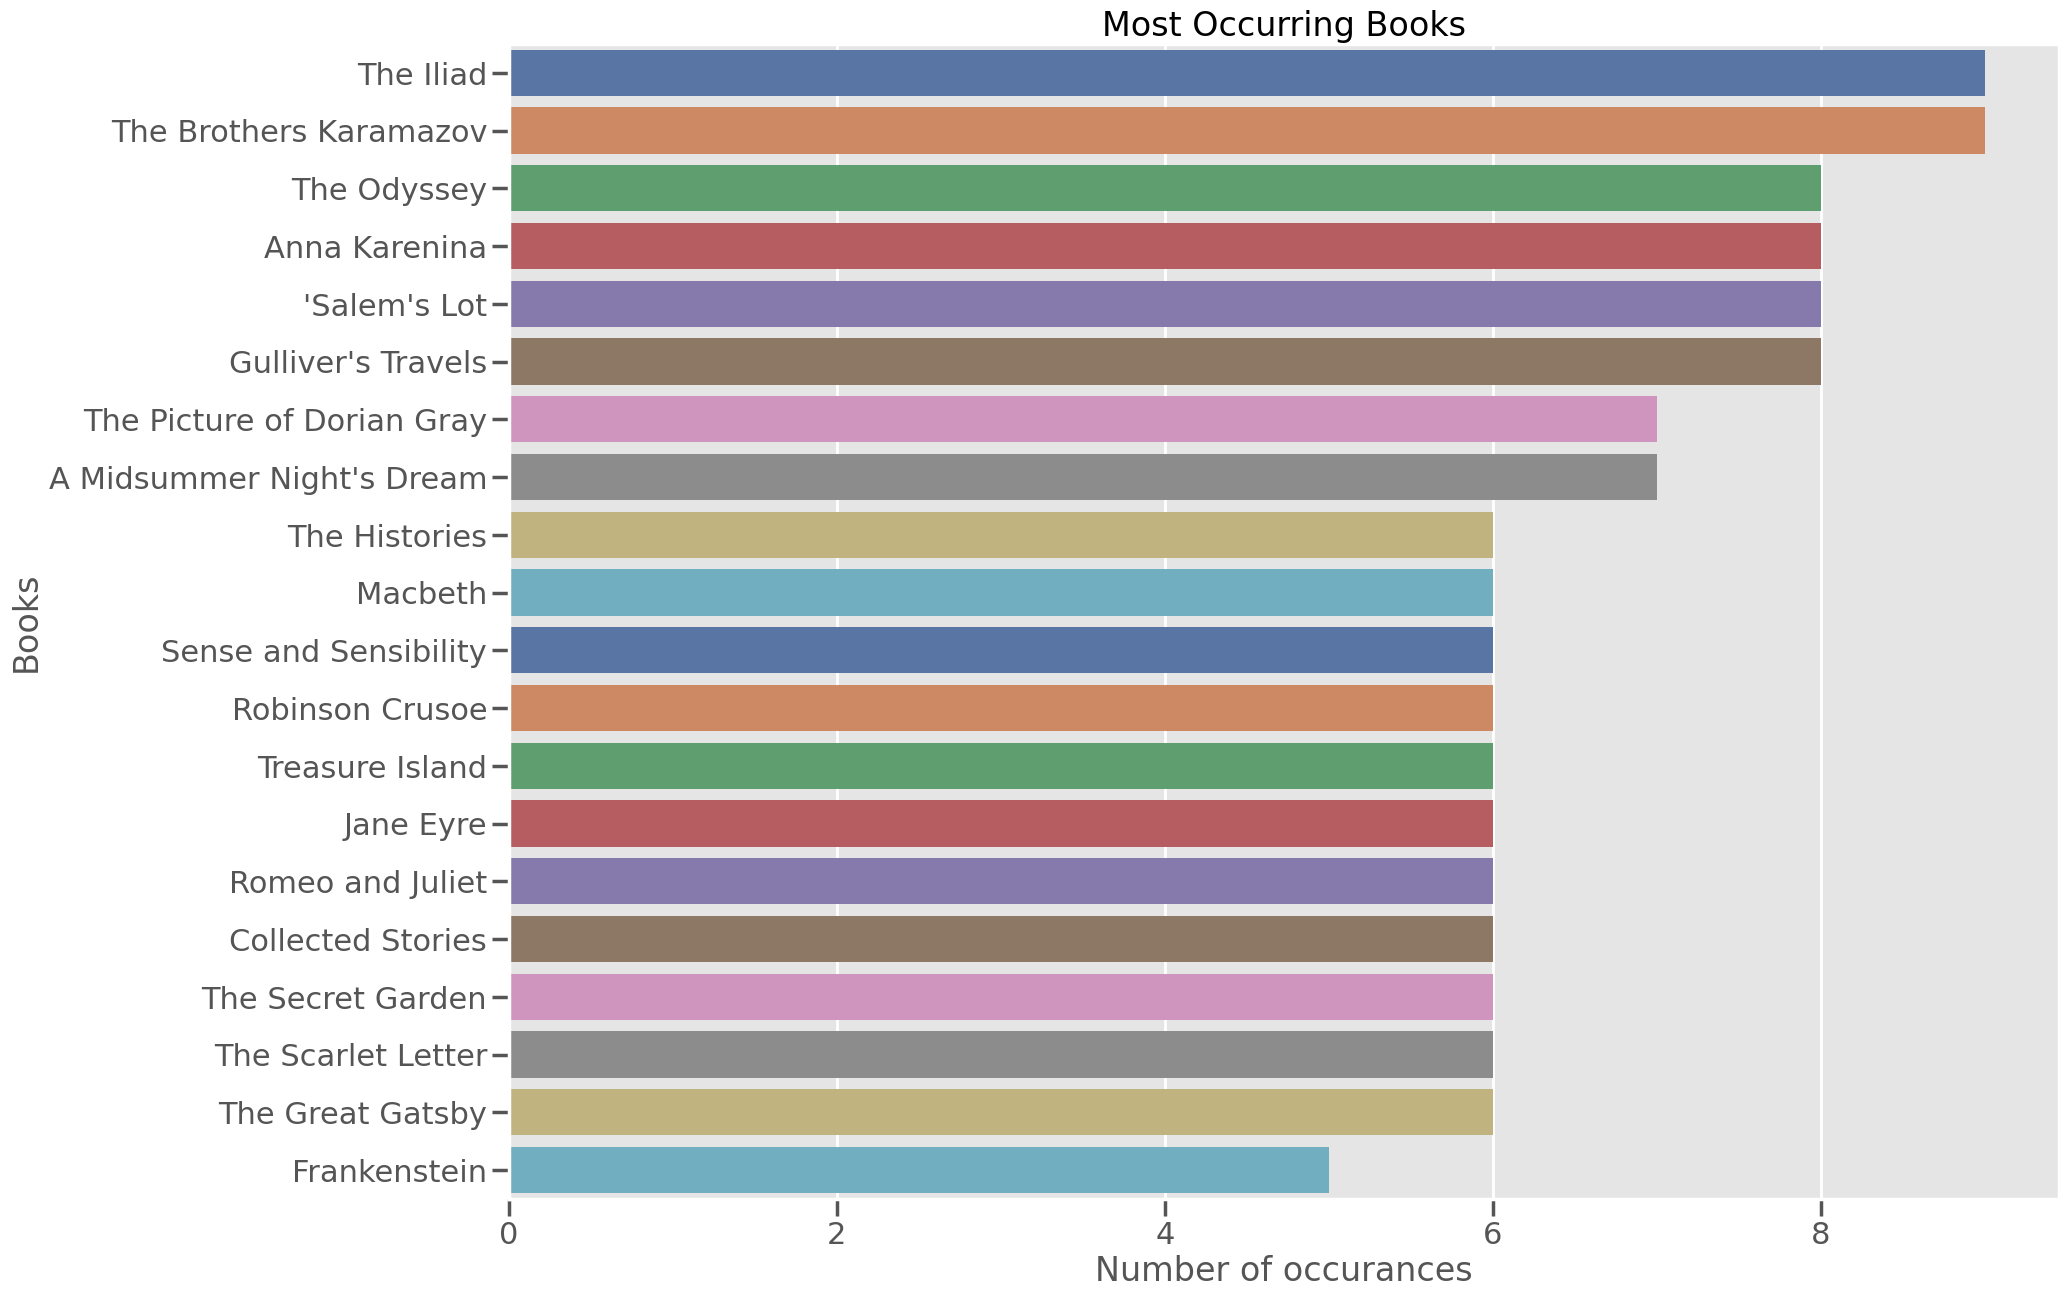

In [13]:
#the first 20
sns.set_context('poster')
plt.figure(figsize=(20,15))

books = df['title'].value_counts()[:20]
rating=df.average_rating[:20]
sns.barplot(x=books,y=books.index,palette="deep")

plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()


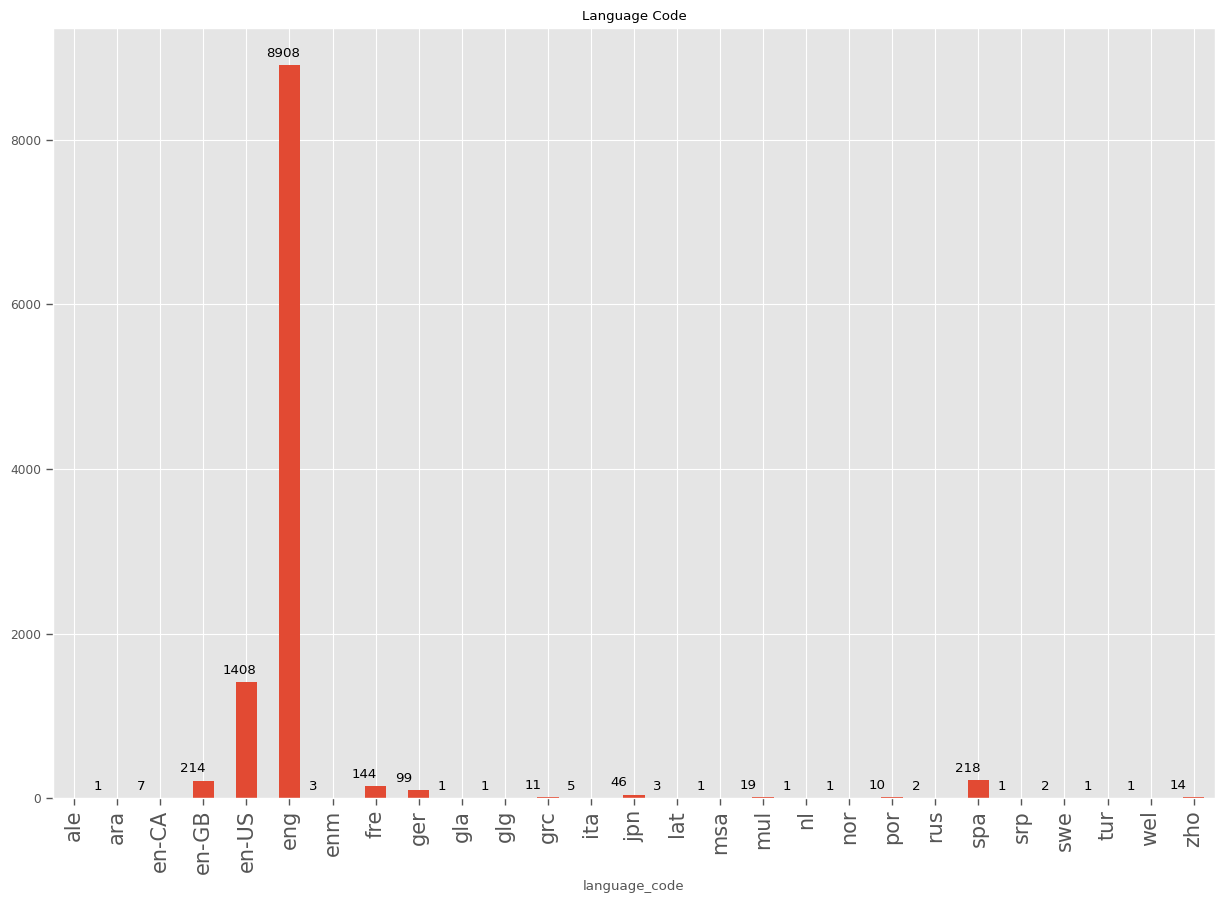

In [14]:
# the distribution of books for all languages
sns.set_context("paper")
plt.figure(figsize=(15,10))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))


<Axes: xlabel='ratings_count', ylabel='title'>

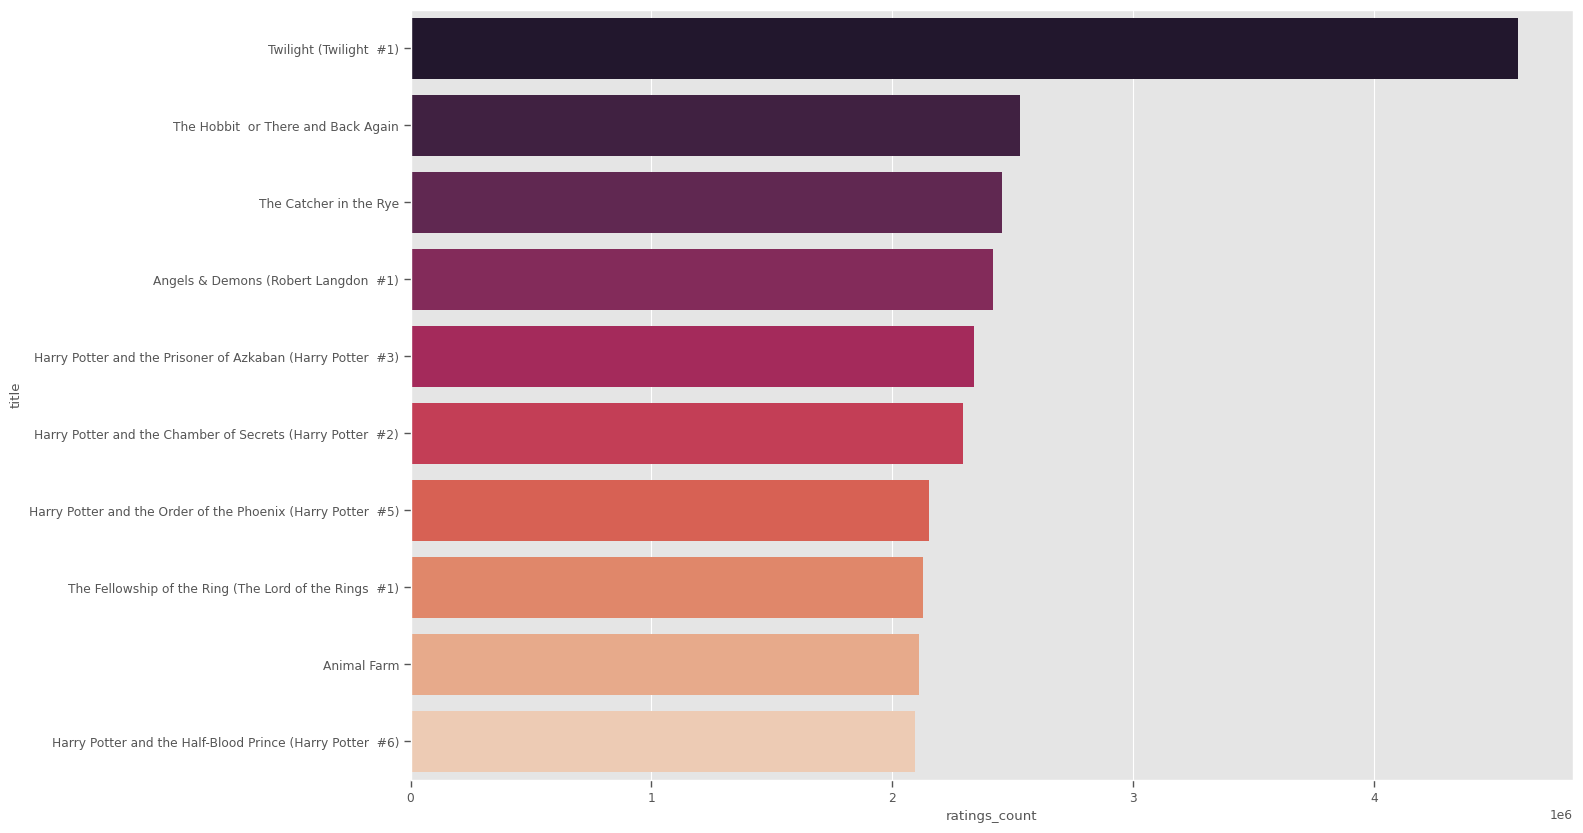

In [24]:
# most rated books
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(x=most_rated['ratings_count'],y= most_rated.index, palette='rocket')


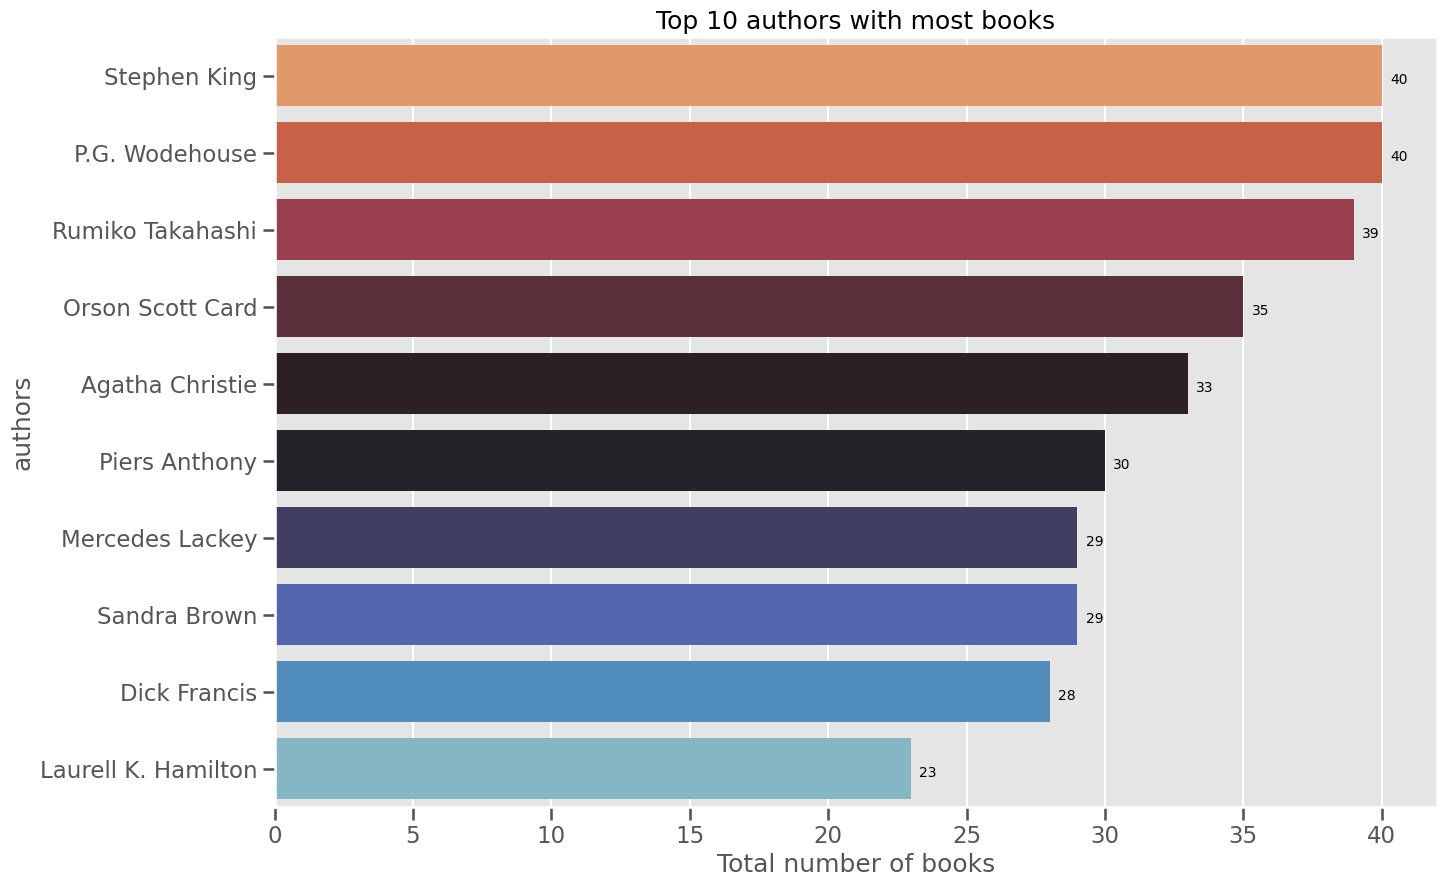

In [26]:
#authors with most books

sns.set_context('talk')
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=most_books['title'],y= most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')


In [29]:
# the top 10 highly rated authors
high_rated_author = df[df['average_rating']>=4.3]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

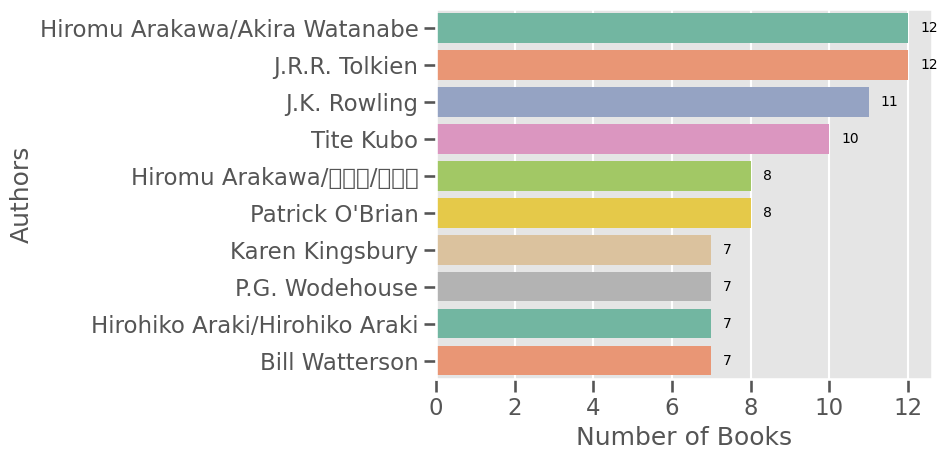

In [30]:
ax = sns.barplot(x=high_rated_author['title'], y= high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

In [31]:
df.average_rating.isnull().value_counts()

False    11123
Name: average_rating, dtype: int64

In [32]:
df.dropna(0, inplace=True)

In [33]:
df.average_rating.isnull().value_counts()

False    11123
Name: average_rating, dtype: int64

<Axes: xlabel='average_rating', ylabel='Density'>

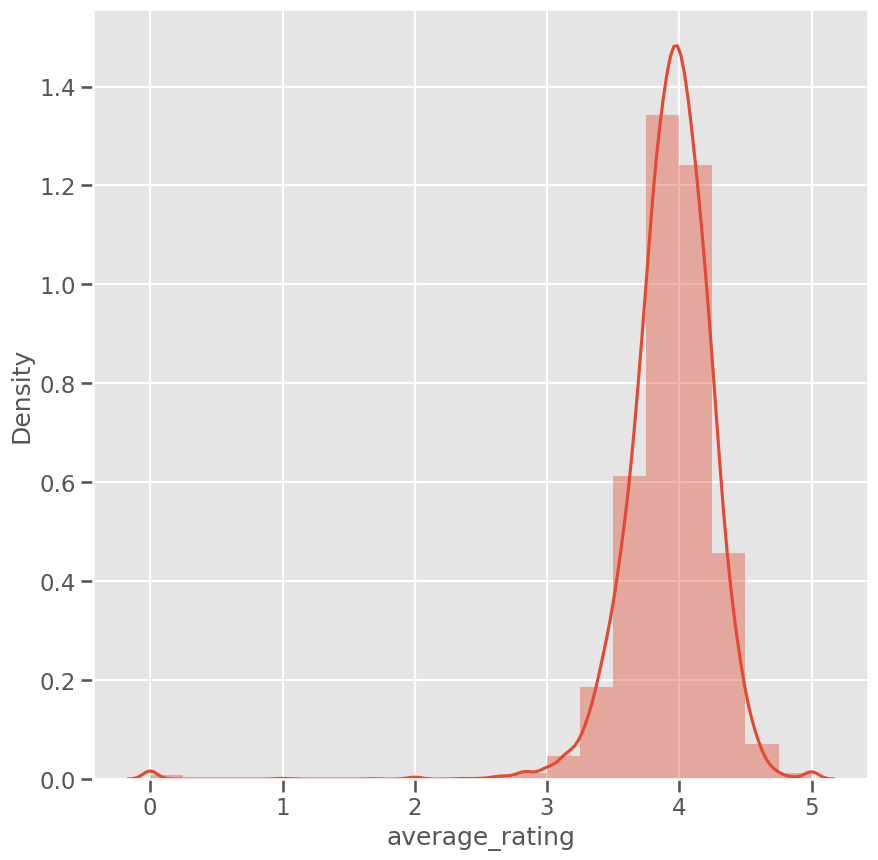

In [34]:
plt.figure(figsize=(10,10))
rating= df.average_rating.astype(float)
sns.distplot(rating, bins=20)


<Axes: >

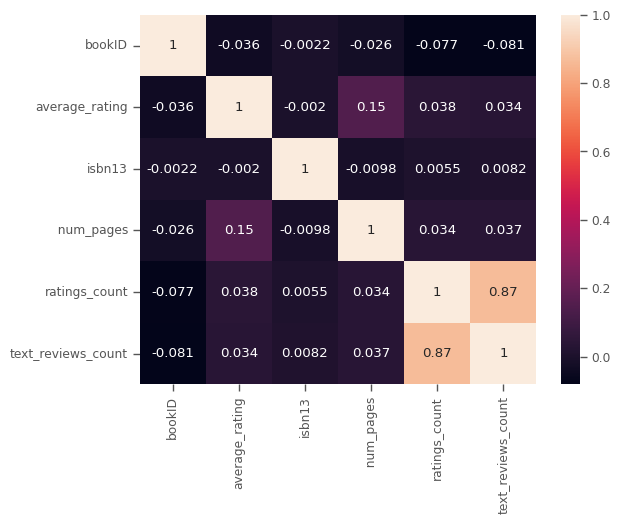

In [40]:
sns.heatmap(df.corr(),annot=True)

In [41]:
# KMeans Clustering without outliers
trial = df[['average_rating', 'ratings_count']]
data = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T

Text(0.5, 1.0, 'Elbow Curve')

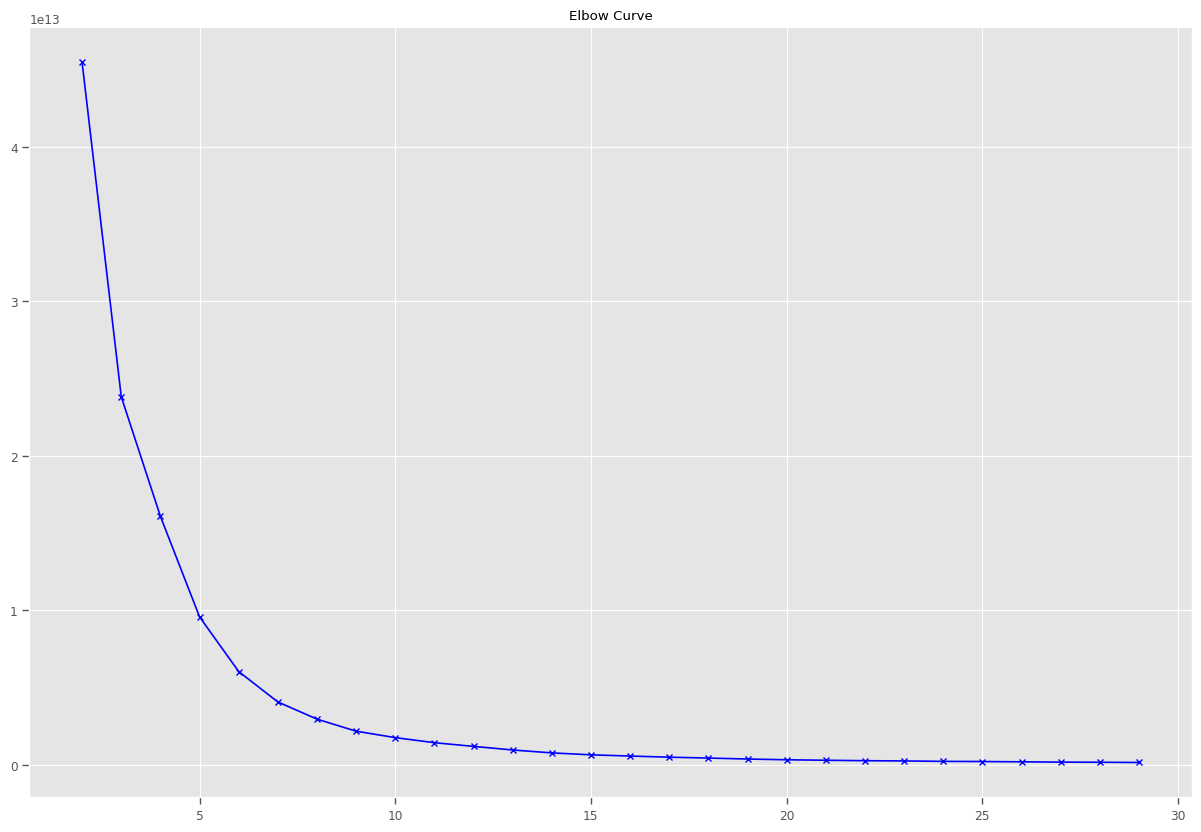

In [44]:
# the elbow methode

x=data
distortions=[]
for k in range(2,30):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(x)
  distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")

In [48]:
# K Nearest Neighbors.

In [51]:
def segregation(data):
    values = []
    for val in data.average_rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values

df['Ratings_Dist'] = segregation(df)

books_features = pd.concat([df['Ratings_Dist'].str.get_dummies(sep=","), df['average_rating'], df['ratings_count']], axis=1)

11123


In [52]:
books_features.head

<bound method NDFrame.head of        Between 0 and 1  Between 1 and 2  Between 2 and 3  Between 3 and 4  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
11118                0                0                0                0   
11119                0                0                0                0   
11120                0                0                0                1   
11121                0                0                0                1   
11122                0                0                0                1   

       Between 4 and 5  average_rating  ratin

In [55]:
# The min-max scaler is used to reduce the bias

minmax_scaler=MinMaxScaler()
books_features=minmax_scaler.fit_transform(books_features)

In [56]:
np.round(books_features, 2)

array([[0.  , 0.  , 0.  , ..., 1.  , 0.91, 0.46],
       [0.  , 0.  , 0.  , ..., 1.  , 0.9 , 0.47],
       [0.  , 0.  , 0.  , ..., 1.  , 0.88, 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.79, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.74, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.78, 0.  ]])

In [60]:
model=neighbors.NearestNeighbors(n_neighbors=5,algorithm="ball_tree")
model.fit(books_features)
distance, indices =model.kneighbors(books_features)

In [66]:
# getting the names
def get_index_from_name(name):
    return df[df["title"]==name].index.tolist()[0]

all_books_names = list(df.title.values)

def get_id_from_partial_name(partial):
    for name in all_books_names:
        if partial in name:
            print(name,all_books_names.index(name))

def print_similar_books(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(df.iloc[id]["title"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(df.iloc[id]["title"])

In [64]:
# testing
print_similar_books("The Idiot")

Horton Hears a Who!
Think and Grow Rich: The Landmark Bestseller Now Revised and Updated for the 21st Century
The Moon is a Harsh Mistress
To the Nines (Stephanie Plum  #9)


In [69]:
get_id_from_partial_name("Harry Potter")

Harry Potter and the Half-Blood Prince (Harry Potter  #6) 0
Harry Potter and the Order of the Phoenix (Harry Potter  #5) 1
Harry Potter and the Chamber of Secrets (Harry Potter  #2) 2
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3) 3
Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5) 4
Unauthorized Harry Potter Book Seven News: "Half-Blood Prince" Analysis and Speculation 5
Harry Potter Collection (Harry Potter  #1-6) 6
Harry Potter Schoolbooks Box Set: Two Classic Books from the Library of Hogwarts School of Witchcraft and Wizardry 613
J.K. Rowling's Harry Potter Novels: A Reader's Guide 614
Harry Potter and the Half-Blood Prince (Harry Potter  #6) 0
Harry Potter Y La Piedra Filosofal (Harry Potter  #1) 988
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3) 3
Looking for God in Harry Potter 4242
Mugglenet.Com's What Will Happen in Harry Potter 7: Who Lives  Who Dies  Who Falls in Love and How Will the Adventure Finally End? 4410
Harry Potter y el misterio del 